# Lesson 1.机器学习基本概念与建模流程

&emsp;&emsp;从导学课程的内容中，我们知道，机器学习（的过程）本质上就是通过数据的不断训练、从而使得模型在其对应评估指标上表现越来越好的这样一个过程，并且我们也知道了，在此过程中至关重要的一点是要能能够给模型提供有效的反馈，同时模型本身也需要根据反馈结果，不断的进行调整。只有该过程能够顺利进行，模型才能得到有效训练，“机器”才能“学习”。

&emsp;&emsp;尽管从通俗的角度理解什么是机器学习并非难事，但要实际构建一个机器学习的模型却绝非易事。这不仅需要我们掌握包括数学原理在内的一定的基础理论，同时也需要我们拥有一定的编程实现能力。不过呢，“合抱之木，生于毫末；九层之台，起于累土”，首先我们先回顾在Lesson 0中介绍的几个机器学习的核心概念，然后我们尝试在Python环境下实现一个简单的模型——线性回归，并在此过程中深入了解机器学习建模的具体流程。

机器学习模型训练相关核心概念：
- 模型评估指标：用于评估模型实际效果的数值型指标，如准确率；
- 模型参数：对模型最终输出结果有影响的模型关键指标，如自变量加权求和汇总过程中的权重；
- 模型训练：指通过不断的数据输入、模型参数得到有效调整的过程，此处模型参数的有效调整指的是调整之后能够提升模型表现。

接下来，我们尝试根据机器学习的一般流程，实现一个简单模型——线性回归的建模。在正式进入建模之前，我们首先还需要补充一些机器学习中的基本概念。

## 一、机器学习概念补充

### 1.经典统计分析方法与机器学习

&emsp;&emsp;线性回归模型是诞生于是统计学领域的一类模型，同时也是整个线性类模型大类的基础模型，是一类非常重要的统计学模型。在经典统计学领域，线性回归模型拥有坚实的数学理论基础作为支撑，曾在很长一段时间内都是数理统计分析建模最通用的模型之一。不过，值得一提的是，使用传统的统计学方法构建线性回归模型其实并不简单，如果要构建一个统计学意义的线性回归模型，则我们至少需要掌握随机变量的基本分布、变量相关性与独立性、方差分析等基本统计学知识，才能够上手构建线性回归模型。而在机器学习领域，由于机器学习的基本建模思路和流程和经典统计分析有很大区别，在构建线性回归模型时流程较为简单，外加线性回归模型本身可解释性较强，因此可以作为入门的第一个算法来学习。

> 其实，从发展历程上来看，有关“算法”或者“模型”的概念早已有之，而实际作用和机器学习算法类似的，就是经典统计学领域的统计分析类算法。不过，尽管机器学习算法是统计分析算法目标一致——核心都是围绕某个具体目标、尝试进行有效的预测，但二者的建模流程和基本思路却有着天壤之别。更多关于二者区别的介绍，我们将在后续课程中逐渐展开讨论。

> 当然，从学术角度考虑，机器学习是否属于统计学尚存争论。课上不作过多学术讨论，此处所谓机器学习和统计方法之间的区别，特指与经典统计分析方法（尤其是遵循古典假设的统计学模型）之间的区别。

&emsp;&emsp;从机器学习的角度出发，所谓线性回归，指的是自变量（特征）加权求和汇总求得因变量（标签）的过程。例如Lesson 0中$y = w_1x_1+w_2x_2$的计算过程，就是一个简单的线性回归。当然，此处我们还需补充关于机器学习中和数据相关的基本概念。

### 2.数据与数据集相关概念

- 数据与数据集

&emsp;&emsp;所谓数据，特指能够描绘某件事物的属性或者运行状态的数值，并且一个数据集由多条数据构成。例如Lesson 0中鸢尾花数据，就是描述鸢尾花一般属性的数据集。我们可以通过本地读取文件的方式查看该数据集。

In [1]:
# 导入相关包
import numpy as np
import pandas as pd

In [2]:
iris_df = pd.read_csv("iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


数据集描述鸢尾花基本信息如下：

<img src="https://i.loli.net/2021/04/04/QxYzbVwI9PCMfXe.jpg" alt="74" style="zoom:30%;" />

在上述数据集中，每一行代表一朵花的记录结果，而其中每一列代表所有花的一项共同指标。类似这种二维表格数据，有时也被称为面板数据，属于结构化数据的一种。

- 特征与标签

&emsp;&emsp;鸢尾花数据集中的每一列是所有描述对象的一项共同指标，其中，前四列分别描述了鸢尾花的四项生物学性状，而最后一列则描述了每一朵花所属类别。当然，如果上述表格的记录目的是通过记录鸢尾花的四个维度的不同属性的取值最终判别鸢尾花属于哪一类，则该数据集中的前四列也被称为数据集的特征（features），而最后一列被称为数据集的标签（labels）。当然，据此，我们在实际建模过程中，当需要利用模型进行预测时时，也是通过输入模型一些样本的特征（一些鸢尾花的四个特征取值），让模型进行每个样本的标签判别（判别每一朵花应该属于哪一类）。

&emsp;&emsp;不过，值得一提的是，所谓标签和特征，只是依据模型预测目标进行的、围绕数据集不同列进行的划分方式，如果模型的预测目标发生变化，则数据集的特征和标签也会发生变化。例如，如果围绕鸢尾花数据集我们最终是进行每一朵花的花瓣宽（petal width）的预测，则上述数据集中1、2、3、5列就变成了特征，第4列变成了标签。因此，特征和标签本质上都是人工设置的。

&emsp;&emsp;一般来说，标签列需要放在最后一列。

> 注意：数据集中的列也被称为字段，鸢尾花数据集中总共有5列，也就总共有5个字段。

- 连续变量和离散变量

&emsp;&emsp;对于鸢尾花数据而言，由于每一条数据都记录了一朵花的四个维度的属性以及花的所属类别，因此，如果从随机变量的角度出发，每一组观测结果我们也能将其视作5个随机变量的一次观测值。例如，我们可以将花萼长（sepal length）看成是一个随机变量，而第一条数据中的5.1cm，则可看成这个随机变量的第一个观测值。

&emsp;&emsp;既然是随机变量，就有离散变量和连续变量之分。所谓连续变量，指的是随机变量能够取得连续数值，例如随机变量表示距离或者长度测算结果时，该变量就是连续性变量。而离散变量则指的是随机变量只允许取得离散的整数，例如随机变量用0/1表示性别。不难发现，鸢尾花数据集中前四个变量都是连续变量，而最后一个变量是离散型变量（或者说可以用离散变量表示）。也就是说鸢尾花数据集的特征都是连续型特征，而标签则是离散型标签。

> 需要补充的一点是，在传统统计分析领域，对于离散型变量，还可以进一步细分为名义型变量和顺序性变量。所谓名义变量，指的是随机变量取得不同离散值时，取值大小本身没有数值意义，只有指代意义。例如，用0/1代表男女，则该变量没有1>0的数值意义。但所谓顺序变量，则有大小方面的数值意义，例如使用0/1/2代表高中/本科/研究生学历，则可用2>1>0来表示学习的高低之分。      

### 3.模型类型

- 分类问题与回归问题

&emsp;&emsp;离散型变量和连续性变量在数理特征上有很大的区别。因此，对于预测类的机器学习建模来说，标签这一预测指标是连续型变量还是离散型变量，会对模型预测过程造成很大影响。

&emsp;&emsp;据此，如果是围绕离散型标签进行建模预测，则称任务为分类预测任务，该模型为解决分类任务的分类（classification）模型，而如果是围绕连续型标签进行建模预测，则称该任务为回归预测任务，该模型为解决回归问题的回归类（regression）模型。

&emsp;&emsp;很明显，如果依据鸢尾花数据集来构建一个预测某一朵花属于哪个类型的任务，属于分类任务，对应的，若需要完成该任务，我们也需要构建对应的分类模型来进行预测。此外，我们再介绍另外一个用于回归类问题建模的数据集，abalone数据集。

&emsp;&emsp;由于abalone数据集是txt格式数据集，各列是通过空格进行分隔，并且第一行没有列名，因此我们需要使用下述语句进行读取。

In [3]:
ab_df = pd.read_csv("abalone.txt", sep='\t', header=None)
ab_df

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


同时，该数据各列名称如下：

|Name|Description|      
|:--:|:--:|      
|Gender|性别，1为Male、-1为Femel、0为infant|      
|Length|最长外壳尺寸|	      
|Diameter|垂直于长度的直径|	      
|Height|带壳肉的高度|    
|Whole weight|整体重量|
|Shucked weight|脱壳重量|
|Viscera weight|内脏的重量|
|Shell weight|壳的重量|
|Rings|（年轮）年龄|

修改数据集列名称

In [4]:
ab_df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [5]:
ab_df.columns = ['Gender', 'Length', 
                 'Diameter', 'Height', 
                 'Whole weight', 'Shucked weight', 
                 'Viscera weight', 'Shell weight',
                 'Rings']

查看修改结果

In [31]:
ab_df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


为了方便后续直接调用，我们可以将修改后的数据集保存在本地

In [6]:
ab_df.to_csv('abalone.csv', index=False)

> 和鸢尾花数据集一样，abalone dataset也是由专业人士精心统计汇总之后得到的数据集。目前来说，此类数据集往往用于机器学习初学者入门时使用。不过值得一提的是，不同的时代数据采集和获取方式有很大区别。在统计学模型大行其道的百年之前，人们获取数据主要都是通过手工测量和记录的方式（当然Abalone数据集没有那么久历史），并且多数情况下是由专业人事进行，因此数据量较小但数据整体质量较高，而经典统计学算法正是在这一背景下、针对这类数据诞生的方法。而伴随着所谓的大数据时代的到来，数据的生产和应用方式都发生了较大的变化，由于数据可以自动采集、传输和存储，因此数据采集的场景变得无处不在、数据量也呈现爆发式增长，同时数据质量也变得层次不齐。此外，在数据应用层面，实际应用的机器学习算法被要求能够即时运算、快速相应，并且对于质量层次不齐的数据要求产出相对稳定的结果，因此相较于经典统计学算法，机器学习算法计算效率更高、对数据质量要求较低，但同时也存在计算精度不高、计算结果不如统计方法稳定等一系列问题。当然这也是机器学习诞生之初饱受诟病的一点。但也正是机器学习不是那么精准但能应用于各个场景的特性，使得其成为“大数据时代”最为普适的算法。

> 当然，也正因如此，我们后续也不会大规模使用一些数据质量特别高、建模门槛比较低的数据集。实际上，在后续的课程中，我们将主要是用三类数据集去进行三个层次的教学。其一是手动创建的、具备一定规律和难度可自定义的数据集，用于前期训练，其二则是竞赛数据，用于综合训练，其三则是企业案例数据，结合实际应用情况进行建模。

&emsp;&emsp;对于abalone数据集来说，Rings是标签，围绕Rings的预测任务是连续型变量的预测任务，因此是个回归类问题。

## 二、线性回归模型建模准备

&emsp;&emsp;接下来，我们尝试手动实现线性回归模型。并借此过程探究机器学习建模的基础理论和一般建模流程。

- 数据准备

&emsp;&emsp;当然，线性回归是属于回归类模型，是针对连续型变量进行数值预测的模型，因此我们需要选用abalone数据集进行建模。此处为了更加清晰的展示建模过程的内部计算细节，我们选取数据集中部分数据带入进行建模。

|Whole weight|Rings|      
|:--:|:--:|   
|1|2|      
|3|4|	      

- 模型准备

&emsp;&emsp;不难看出，上述数据集是极端简化后的数据集，只有一个连续型特征和连续型标签，并且只包含两条数据。围绕只包含一个特征的数据所构建的线性回归模型，也被称为简单线性回归。简单线性回归的模型表达式为$$y = wx + b$$其中x表示自变量，即数据集特征，w表示自变量系数，代表每次计算都需要相乘的某个数值，b表示截距项，代表每次计算都需要相加的某个数值，而y表示因变量，即模型输出结果。

> 除了简单线性回归外，线性回归主要还包括多元线性回归和多项式回归两类。      
其中，`多元线性回归`用于解决包含多个特征的回归类问题，模型基本表达式为：$$y = w_1x_1+w_2x+...+w_nx_n+b$$其中$x_{1...n}$表示n个自变量，对应数据集的n个特征，$w_{1...n}$表示n个自变量的系数，b表示截距。此处“加权求和汇总”的计算过程较为明显，简单线性回归也是多元线性回归的一个特例。      
此外，`多项式回归`则是在多元线性回归基础上，允许自变量最高次项超过1次，例如：$$y = w_1x_1^2+w_2x_2+b$$就代表着一个二元二次回归方程。

&emsp;&emsp;准备好了数据和算法之后，接下来就是模型训练过程。

## 三、线性回归模型训练

### 1.模型训练的本质：有方向的参数调整

- 模型训练与模型参数调整

&emsp;&emsp;那到底什么是模型训练呢？我们曾在Lesson 0中提到，模型训练就是指对模型参数进行有效调整。模型参数是影响模型输出的关键变量，例如本例中的模型包含两个参数，$w_1和b$，当参数取得不同值时，模型将输出完全不同的结果。

|数据特征|参数组|模型输出|数据标签|      
|:--:|:--:|:--:|:--:|   
|Whole weight(x)|$(w,b)$|$\hat y$|Rings(y)|    
|1|(1, -1)|0|2|
|3|(1, -1)|2|4|
|1|(1, 0)|1|2|
|3|(1, 0)|3|4|

其中简单线性回归计算过程为$y = wx+b$。需要说明的是，在很多场景下，我们会使用更加简洁的记号用于代表模型训练过程中的各项数值，用$x_i$表示某条数据第$i$个特征的取值，使用$y$作为某条数据的标签取值，使用$\hat y$表示某条数据带入模型之后模型输出结果。

&emsp;&emsp;从上式不难看出，模型参数取值不同模型输出结果也不同，而不同组的参数取值似乎也有“好坏之分”，当参数组取值为(1,0)时的模型输出结果，要比参数组取值为(1,-1)时输出结果更加贴近真实值。这其实也就说明第二组参数要好于第一组参数。而“机器”在“学习”的过程，或者说模型训练过程，就是需要找到一组最优参数。

- 模型评估指标与损失函数

&emsp;&emsp;既然有了模型输出结果“好与坏”的判别，根据Lesson 0中的观点，我们需要将这种反馈有效的传递给模型，才能够让模型在训练过程中逐渐朝向好的方向发展。而要在模型训练过程中建立这种有效的反馈，我们就必须先掌握两个基本概念，即模型评估指标与损失函数。

&emsp;&emsp;其中，模型评估指标是评估模型输出结果“好与坏”的标量计算结果，其最终结果一般由模型预测值$\hat y$和真实值$y$共同计算得出。例如Lesson 0中的准确率就是一个分类模型的评估指标，并且是通过比较模型预测正确的样本数占总样本数的比例最终得出。而对于回归类问题，最重要的模型评估指标就是SSE——残差平方和。

&emsp;&emsp;所谓残差平方和，指的是模型预测值$\hat y$和真实值$y$之间的差值的平方和，计算结果表示预测值和真实值之间的差距，结果越小表示二者差距越小，模型效果越好。SSE基本计算公式为$$SSE = \sum_{i=1}^{n}(\hat y_i-y_i)^2$$

其中n为样本数量。对应的，上述两组不同参数取值对应的模型残差平方和计算结果依次为：

$$SSE_{(1,-1)} = (0-2)^2+(2-4)^2 = 8$$
$$SSE_{(1,0)} = (1-2)^2+(3-4)^2 = 2$$

能够看出，第二组参数对应模型效果更好。据此我们就找到了能够量化评估模型效果好坏的指标。

&emsp;&emsp;有了模型评估指标之后，我们还需要将评估结果有效的反馈给模型。这时就需要引入另一个至关重要的概念：损失函数（Loss Function）。

&emsp;&emsp;和模型评估指标是真实值和预测值的计算过程不同，模型的损失函数都是关于模型参数的函数。损失函数本质上一个衡量模型预测结果和真是结果之间的差异的计算过程，例如在SSE中如果带入模型参数，则就能构成一个SSE损失函数，基本计算过程如下：

|数据特征|参数组|模型输出|数据标签|      
|:--:|:--:|:--:|:--:|   
|Whole weight(x)|$(w,b)$|$\hat y$|Rings(y)|    
|1|(w, b)|w+b|2|
|3|(w, b)|3w+b|4|

$$SSELoss(w, b) = (y_1 - ŷ_1)^2 + (y_2 - ŷ_2)^2 = (2 - w - b)^2 + (4 - 3w - b)^2$$

SSELoss的基本计算过程和SSE一致，只不过SSELoss中带入的是模型参数，而SSE带入的是确定参数值之后的计算结果，因此我们也可以认为对于SSELoss和SSE来说，一个是带参数的方程，一个是确定方程参数之后的计算结果。

&emsp;&emsp;既然SSE和SSELoss的计算过程类似，那为何要区别损失函数和模型评估指标呢？主要有以下几点原因：      
其一：对于很多模型（尤其是分类模型）来说，模型评估指标和模型损失函数的计算过程并不一致，例如准确率就很难转化为一个以参数为变量的函数表达式；      
其二：模型评估指标和损失函数构建的目标不同，模型评估指标的计算目标是给模型性能一个标量计算结果，而损失函数的构建则是为了找到一组最优的参数结果。

> 除了SSE以外，常用的回归类问题的评估指标还有MSE（均方误差）和RMSE（均方根误差），其中MSE就是在SSE的基础上除以样本总量：
$$MSE = \frac{1}{n}SSE = \frac{1}{n}\sum_{i=1}^{n}(\hat y_i-y_i)^2$$
而RMSE则是在MSE基础之上开平方算得的结果：
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat y_i-y_i)^2}$$
对应的，MSE和RMSE也有相对的损失函数。

- 损失函数与参数求解

&emsp;&emsp;一旦损失函数构建完成，我们就可以围绕损失函数去寻找损失函数的最小值，以及求出损失函数取得最小值时函数自变量（也就是模型参数）的取值，此时参数的取值就是原模型中参数的最优取值结果。这点从SSE和SSELoss彼此类似的计算过程能够很容易看出来，由于我们最终建模目标是希望模型预测结果和真实结果一致，也就是SSE的取值尽可能小，而SSE的值是SSELoss中的两个变量(w,b)取值决定的，因此如果我们能找到一组(w,b)使得SSE的最终计算结果尽可能的小，也就相当于找到了一组模型的最佳参数。

&emsp;&emsp;至此，我们就发现了损失函数的核心作用：搭建参数求解的桥梁，构建一个协助模型求解参数的方程。通过损失函数的构建，我们可以将求解模型最优参数的问题转化为求解损失函数最小值的问题。至此也就完成了此前所说的确定反馈传递反馈的过程。

> 值得注意的是，损失函数的计算方程和实际带入进行建模的数据直接相关，上述SSELoss是在带入两条数据的情况下构建的损失函数，而调整输入数据，损失函数实际计算方程也会发生变化。       

> 此外，还有一个和损失函数非常类似的概念——目标函数。目标函数概念相对复杂，并且对当前介绍内容并无影响，因此将放在后续进行介绍。

### 2.利用最优化方法求解损失函数

- 损失函数的求解

&emsp;&emsp;在构建好损失函数之后，接下来就是如何求解损失函数的最小值（及损失函数取得最小值时w和b的取值）。值得注意的是，此时损失函数是一个关于模型参数的方程，也就是说模型参数此时成了损失函数的自变量。

&emsp;&emsp;而要求解损失函数最小值，就需要记住一些优化理论和优化算法。当然，此处的优化理论和算法都是一些无约束条件下进行函数极值求解的方法。利用优化方法求解损失函数最小值及其取得最小值时损失函数自变量（也就是模型参数）的取值过程，也被简称为损失函数求解。

- 图形展示损失函数

&emsp;&emsp;为了更好的讨论损失函数（SSELoss）求最小值的过程，对于上述二元损失函数来说，我们可以将其展示在三维空间内：三维空间坐标分别为w、b、SSELoss。此处我们可以使用Python中matplotlib包和Axes3D函数进行三维图像绘制

$$SSELoss(w, b) = (y_1 - ŷ_1)^2 + (y_2 - ŷ_2)^2 = (2 - w - b)^2 + (4 - 3w - b)^2$$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.arange(-1,3,0.05)
y = np.arange(-1,3,0.05)
w, b = np.meshgrid(x, y)
SSE = (2 - w - b) ** 2 + (4 - 3 * w - b) ** 2

NameError: name 'np' is not defined

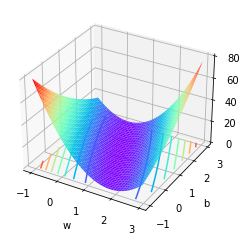

In [9]:
ax = plt.axes(projection='3d')

ax.plot_surface(w, b, SSE, cmap='rainbow')
ax.contour(w, b, SSE, zdir='z', offset=0, cmap="rainbow")  #生成z方向投影，投到x-y平面
plt.xlabel('w')
plt.ylabel('b')
plt.show()

根据图像，我们大概能判断损失函数最小值点位置。

- 函数的凹凸性

&emsp;&emsp;初步探索函数图像，不难看出，目标函数是个整体看起来“向下凸”的函数。从理论出发我们知道，函数的凹凸性是函数的重要性质，也是涉及到损失函数求解方法选取的重要性质。这里我们首先给出凸函数的一般定义，对于任意一个函数，如果函数f(x)上存在任意两个点，$x_1, x_2$，且      
$$ \frac{f(x_1) + f(x_2)}{2} >= f(\frac{x_1 + x_2}{2}) $$    
我们就判定，这个函数是凸函数。 

> 这里需要注意的是，凸函数的定义存在一定的“不一致”，和之前一样，此处我们不作过多学术讨论，仅以“向下凸”的函数作为凸函数的一般定义。

> 此外，除了函数定义法，我们还可以通过凸集/凹集来定义凸函数。同时，很多机器学习模型所构建的损失函数都是凸函数，因此关于凸函数的优化方法（找到最小值的方法）也就成了机器学习建模过程中最常用的优化方法。而凸优化的相关理论，也逐渐成为算法工程师们的必修课。

典型的凸函数如$y = x^2$，我们可以绘制函数图像如下：

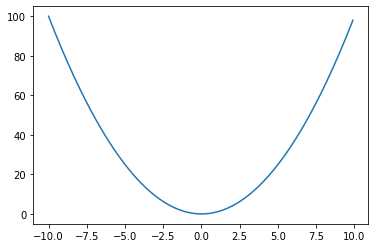

In [10]:
x = np.arange(-10,10,0.1)
y = x ** 2
plt.plot(x, y, '-')
plt.show()

不难看出，函数上任意两个点的y取值的均值（函数值的均值）都不小于这两个点均值的y的值（均值的函数值）。

<img src="https://i.loli.net/2021/01/21/AfR1sjbMUVP5c6r.jpg" alt="9" style="zoom:50%;" />

In [10]:
# 函数值的均值
# x1 = 1, x2 = 3
(1 ** 2 + 3 ** 2)/2

5.0

In [11]:
# 均值的函数值
# x1 = 1, x2 = 3
((1+3)/2) ** 2

4.0

而对于一个凸函数来说，全域最小值明显存在。求解凸函数的最小值有很多种方法，其中最为基础的方法叫做最小二乘法。并且，虽然此处略过了相关证明过程，但对于上述SSELoss，本质上也是一个凸函数。因此我们是可以通过最小二乘法对SSELoss进行求解的。

- 最小二乘法理论基础

&emsp;&emsp;我们先抛开公式、从一个简单的角度理解最小二乘法。      
&emsp;&emsp;通过上例，也就是$ y = x^2 $函数中不难看出，函数全域最小值点为$x=0$点，同时该点对应的函数切线与x轴平行，也就是在最小值点，函数的导数为0。其实这并不难理解，在最小值点左边函数逐渐递减、而在最小值点右边函数逐渐递增，最小值点左右两边函数单调性相反。      
&emsp;&emsp;而这种性质其实可以拓展为凸函数的一个关于求解最小值的一般性质，即：    
（1）对于一元函数，如果存在导数为0的点，则该点就是最小值点；      
（2）对于多元函数，如果存在某一点，使得函数的各个自变量的偏导数都为0，则该点就是最小值点。

&emsp;&emsp;据此，我们就找到了最小二乘法求解凸函数最小值的基本出发点：即通过寻找损失函数导函数（或者偏导函数联立的方程组）为0的点，来求解损失函数的最小值。

> 关于驻点、临界点、边界点和拐点的概念讨论：      
&emsp;&emsp;其实从更严格的意义上来说，凸函数的最小值点其实是根据边界点和驻点（导数为0的点）决定，如果没有边界点且没有驻点，则函数没有最小值（例如y=x），如果存在边界点，但没有驻点，则边界点的一侧就是最小值点，如果存在驻点（且左右两边单调性相反），则驻点就是最小值点，例如，对于$ y = x^2 $而言，$ y^{'} = 2x $，2x = 0时x取值为0，也就是0点就是最小值点。      
值得注意的是，驻点也可以说是临界点，但不是拐点，拐点特指左右两边函数凹凸性发生变化的点，切勿和驻点混淆。

- 最小二乘法求解SSELoss

&emsp;&emsp;接下来，尝试利用最小二乘法求解SSELoss。根据上述理论，我们使用最小二乘法求解SSELoss，即
$$ SSELoss=  (2 - w - b)^2 + (4 - 3w - b)^2 $$，本质上就是在找到能够令损失函数偏导数取值都为零的一组$(w,b)$。SSELoss的两个偏导数计算过程如下：

<center>$ \begin{align} \frac{\partial{SSELoss}}{\partial{(w)}}  
& = 2(2-w-b)*(-1) + 2(4-3w-b)*(-3)\\
& = 20w+8b-28 \\
& = 0  \end{align} $</center>

<center>$ \begin{align} \frac{\partial{SSELoss}}{\partial{(b)}}  
& = 2(2-w-b)*(-1) + 2(4-3w-b)*(-1)\\
& = 8w+4b-12 \\ 
& = 0 \end{align} $</center>

<center>$ (1)式 - (2)式*2 可得： 4w-4 = 0，w=1$ <\center>
<center>$ 将w=1带入(2)式 可得： 4b-4 = 0，b=1$ <\center>

最终可得，损失函数最小值点为(1,1)，即当$w=1,b=1$时模型损失函数计算结果最小、模型SSE取值最小、模型效果最好，此时SSE=0，线性回归模型计算结果为：$$ y = x + 1 $$

我们也可对比此前参数计算结果：

|数据特征|参数组|模型输出|数据标签|      
|:--:|:--:|:--:|:--:|   
|Whole weight(x)|$(w,b)$|$\hat y$|Rings(y)|    
|1|(1, -1)|0|2|
|3|(1, -1)|2|4|
|1|(1, 0)|1|2|
|3|(1, 0)|3|4|

至此，我们就完成了一个机器学习建模的完整流程。

## 四、机器学习建模一般流程

&emsp;&emsp;作为本节重点学习对象，此处我们整体梳理下机器学习的一般建模流程：

- Step 1：提出基本模型      
&emsp;&emsp;如本节中，我们尝试利用简单线性回归去捕捉一个简单数据集中的基本数据规律，这里的$y=wx+b$就是我们所提出的基本模型。当然，在后续的学习过程中，我们还将接触诸多不同种类的机器学习模型，而不同的模型也有对应的适用场景。值得注意的是，在提出模型时，我们往往会预设好一些影响模型结构或者实际判别性能的参数，如简单线性回归中的w和b；

- Step 2：确定损失函数

&emsp;&emsp;接下来，围绕建模的目标构建评估指标，并且围绕评估指标设置损失函数。当然，在本例中，模型评估指标和损失函数的建模流程相同。这里尤其需要反复提醒的是，损失函数不是模型，而是模型参数所组成的一个函数。

- Step 3：根据损失函数性质，选择优化方法

&emsp;&emsp;之前提到，损失函数既承载了我们优化的目标（让预测值和真实值尽可能接近），同时也是包含了模型参数的函数，当我们围绕目标函数求解最小值时，也就完成了模型参数的求解。当然，这个过程本质上就是一个数学的最优化过程，求解目标函数最小值本质上也就是一个最优化问题，而要解决这个问题，我们就需要灵活适用一些最优化方法。当然，在具体的最优化方法的选择上，函数本身的性质是重要影响因素，也就是说，不同类型、不同性质的函数会影响优化方法的选择。在简单线性回归中，由于目标函数是凸函数，我们根据凸函数性质，我们选取了最小二乘法作为该损失函数的优化算法。但实际上，简单线性回归的损失函数其实是所有机器学习模型中最简单的一类损失函数，后续我们还将介绍其他模型的更加复杂的损失函数，以及对应的损失函数求解方法。

- Step 4.利用优化算法进行损失函数求解

&emsp;&emsp;在确定优化方法之后，我们就能够借助优化方法对损失函数进行求解，当然在大多数情况下我们都是求解损失函数的最小值。而伴随损失函数最小值点确定，我们也就找到了一组对应的损失函数自变量的取值，而改组自变量的取值也就是模型的最佳参数。在本例中，通过优化方法求解损失函数的过程还是非常简单的，后续我们在进行更加复杂的损失函数、并适用更加复杂的优化算法案进行求解时，我们会发现，损失函数的求解过程才是建模的主体。

&emsp;&emsp;截止目前，我们并未在数学理论和代码上展开讨论，此处我们也是希望能够在数学理论和代码难度不设门槛的情况下，先行介绍关于机器学习基础理论以及机器学习的一般建模流程。在后续的课程中，数学理论和代码难度都将逐渐提升。类似于最小二乘法严谨数学推导、手动实现复杂数据集上的线性回归建模、其他常用优化算法、调动Scikit-Learn完成相关建模工作等，都将在Lesson 2中进行详细讨论。